# We are using NYC taxi data and predict the trip duration of customers
# We start by importing essential libraries and then importing our training data

# Data description 
id - a unique identifier for each trip,
vendor_id - a code indicating the provider associated with the trip record,
pickup_datetime - date and time when the meter was engaged,
dropoff_datetime - date and time when the meter was disengaged,
passenger_count - the number of passengers in the vehicle (driver entered value),
pickup_longitude - the longitude where the meter was engaged,
pickup_latitude - the latitude where the meter was engaged,
dropoff_longitude - the longitude where the meter was disengaged,
dropoff_latitude - the latitude where the meter was disengaged,
store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memoryY=store N=not store,
trip_duration - duration of the trip in seconds

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

# Check the head, description and info of data 

In [3]:
train.head(3)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124


In [4]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


# We look for number of missing values by using isnull

In [6]:
train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

# Now we drop the unnecessary columns and add dummies

In [8]:
f = pd.get_dummies(train['store_and_fwd_flag'],drop_first = True)

In [9]:
train = pd.concat([train,f],axis = 1)

In [11]:
train['flag_Y_N'] = train['Y']

In [14]:
train.head(1)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,flag_Y_N
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.96463,40.765602,N,455,0


In [13]:
train = train.drop('Y',axis = 1)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   id                 1458644 non-null  object 
 1   vendor_id          1458644 non-null  int64  
 2   pickup_datetime    1458644 non-null  object 
 3   dropoff_datetime   1458644 non-null  object 
 4   passenger_count    1458644 non-null  int64  
 5   pickup_longitude   1458644 non-null  float64
 6   pickup_latitude    1458644 non-null  float64
 7   dropoff_longitude  1458644 non-null  float64
 8   dropoff_latitude   1458644 non-null  float64
 9   trip_duration      1458644 non-null  int64  
 10  flag_Y_N           1458644 non-null  uint8  
dtypes: float64(4), int64(3), object(3), uint8(1)
memory usage: 112.7+ MB


In [16]:
train = train.drop('store_and_fwd_flag',axis=1)

In [18]:
train = train.drop(['id', 'pickup_datetime','dropoff_datetime'],axis =1)

In [19]:
train.head(3)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,flag_Y_N
0,2,1,-73.982155,40.767937,-73.964630,40.765602,455,0
1,1,1,-73.980415,40.738564,-73.999481,40.731152,663,0
2,2,1,-73.979027,40.763939,-74.005333,40.710087,2124,0


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   vendor_id          1458644 non-null  int64  
 1   passenger_count    1458644 non-null  int64  
 2   pickup_longitude   1458644 non-null  float64
 3   pickup_latitude    1458644 non-null  float64
 4   dropoff_longitude  1458644 non-null  float64
 5   dropoff_latitude   1458644 non-null  float64
 6   trip_duration      1458644 non-null  int64  
 7   flag_Y_N           1458644 non-null  uint8  
dtypes: float64(4), int64(3), uint8(1)
memory usage: 79.3 MB


# Split data into X_train and y_train for feeding our model

In [20]:
X_train = train.drop('trip_duration',axis = 1)

In [40]:
X_train.head(1)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,flag_Y_N
0,2,1,-73.982155,40.767937,-73.96463,40.765602,0


In [21]:
y_train = train['trip_duration']

# We import our test file and do the same steps we did for training set

In [23]:
test = pd.read_csv('test.csv')

In [27]:
test.head(3)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N


In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  625134 non-null  object 
 1   vendor_id           625134 non-null  int64  
 2   pickup_datetime     625134 non-null  object 
 3   passenger_count     625134 non-null  int64  
 4   pickup_longitude    625134 non-null  float64
 5   pickup_latitude     625134 non-null  float64
 6   dropoff_longitude   625134 non-null  float64
 7   dropoff_latitude    625134 non-null  float64
 8   store_and_fwd_flag  625134 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 42.9+ MB


In [26]:
test.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

In [28]:
test = test.drop(['id','pickup_datetime'],axis = 1)

In [29]:
test.head(3)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,1,1,-73.988129,40.732029,-73.990173,40.756680,N
1,1,1,-73.964203,40.679993,-73.959808,40.655403,N
2,1,1,-73.997437,40.737583,-73.986160,40.729523,N


In [30]:
s = pd.get_dummies(test['store_and_fwd_flag'],drop_first=True)

In [31]:
test = pd.concat([test,s],axis =1)

In [32]:
test = test.drop('store_and_fwd_flag',axis=1)

In [33]:
test.head(3)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Y
0,1,1,-73.988129,40.732029,-73.990173,40.756680,0
1,1,1,-73.964203,40.679993,-73.959808,40.655403,0
2,1,1,-73.997437,40.737583,-73.986160,40.729523,0


In [34]:
test['flag_Y_N'] = test['Y']

In [35]:
test = test.drop('Y',axis =1)

In [36]:
test.head(3)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,flag_Y_N
0,1,1,-73.988129,40.732029,-73.990173,40.756680,0
1,1,1,-73.964203,40.679993,-73.959808,40.655403,0
2,1,1,-73.997437,40.737583,-73.986160,40.729523,0


In [37]:
X_test = test

# Carry out Normalization with MinMaxScaler for both X_train and X_test

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()

In [41]:
X_train = scaler.fit_transform(X_train)

In [42]:
X_test = scaler.transform(X_test)

# Model Creation 
# We will add dropout and train our model

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

In [45]:
model = Sequential()

model.add(Dense(14,activation = 'relu'))
model.add(Dropout(.5))

model.add(Dense(14,activation = 'relu'))
model.add(Dropout(.25))

model.add(Dense(14,activation = 'relu'))
model.add(Dropout(.5))

model.add(Dense(14,activation = 'relu'))
model.add(Dropout(.25))

model.add(Dense(1))
#this is the final layer and has one nueron as we are only getting output here

model.compile(optimizer = 'adam', loss = 'mse')

In [47]:
X_train.shape

(1458644, 7)

In [87]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  112       
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  210       
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  210       
_________________________________________________________________
dropout_2 (Dropout)          multiple                  0         
_________________________________________________________________
dense_3 (Dense)              multiple                  2

# We train the model and choose a batch size as the training set is too large and this can take a lot of time

In [48]:
model.fit(x = X_train,
         y = y_train,
         validation_split= .10,
         epochs= 50,
         verbose = 1,
         batch_size = 1000,
         shuffle = True)

Epoch 1/50
1313/1313 [==============================] - 2s 2ms/step - loss: 29405028.0000 - val_loss: 10072781.0000
Epoch 2/50
1313/1313 [==============================] - 2s 2ms/step - loss: 29406328.0000 - val_loss: 10073708.0000
Epoch 3/50
1313/1313 [==============================] - 2s 2ms/step - loss: 29402184.0000 - val_loss: 10073276.0000
Epoch 4/50
1313/1313 [==============================] - 2s 2ms/step - loss: 29402360.0000 - val_loss: 10068082.0000
Epoch 5/50
1313/1313 [==============================] - 2s 2ms/step - loss: 29399502.0000 - val_loss: 10080017.0000
Epoch 6/50
1313/1313 [==============================] - 2s 2ms/step - loss: 29399222.0000 - val_loss: 10058898.0000
Epoch 7/50
1313/1313 [==============================] - 2s 2ms/step - loss: 29397512.0000 - val_loss: 10074569.0000
Epoch 8/50
1313/1313 [==============================] - 2s 2ms/step - loss: 29396876.0000 - val_loss: 10066481.0000
Epoch 9/50
1313/1313 [==============================] - 2s 2ms/step - lo

In [49]:
loss = pd.DataFrame(model.history.history)

# We can clearly see the model is not working properly.... It's Underfitting

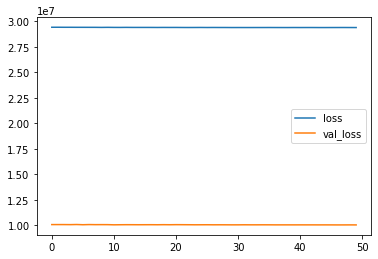

In [50]:
loss.plot()

In [54]:
prediction = model.predict(X_test)

In [58]:
T = pd.read_csv('test.csv')

# Here we convert our prediction to a dataframe and export the results to csv file

In [60]:
Result = pd.DataFrame(prediction,T['id'],columns=['trip_duration'])

In [62]:
Result.to_csv('Result')

# Now we will build a model and add earlystopping to it

In [63]:
stop = EarlyStopping(monitor='val_loss',mode='min',patience=20,verbose=1)

In [79]:
model2 = Sequential()

model2.add(Dense(7,activation = 'relu'))

model2.add(Dense(7,activation = 'relu'))

model2.add(Dense(7,activation = 'relu'))

model2.add(Dense(7,activation = 'relu'))

model2.add(Dense(1,activation = 'relu'))
#this is the final layer and has one nueron as we are only getting output here

model2.compile(optimizer = 'adam', loss = 'mse')

In [80]:
model2.fit(x=X_train,
          y=y_train,
          validation_split=.25,
          epochs = 100,
          batch_size=128,
          shuffle = True ,
          verbose = 1,
          callbacks=[stop])

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

8547/8547 [==============================] - 9s 1ms/step - loss: 33247246.0000 - val_loss: 10057121.0000
Epoch 2/100
8547/8547 [==============================] - 8s 890us/step - loss: 33207554.0000 - val_loss: 10056806.0000
Epoch 3/100
8547/8547 [==============================] - 9s 1ms/step - loss: 33207330.0000 - val_loss: 10057375.0000
Epoch 4/100
8547/8547 [==============================] - 11s 1ms/step - loss: 33207564.0000 - val_loss: 10057848.0000
Epoch 5/100
8547/8547 [==============

8547/8547 [==============================] - 8s 896us/step - loss: 33206672.0000 - val_loss: 10056359.0000
Epoch 64/100
8547/8547 [==============================] - 8s 900us/step - loss: 33206368.0000 - val_loss: 10056034.0000
Epoch 65/100
8547/8547 [==============================] - 8s 891us/step - loss: 33206388.0000 - val_loss: 10057663.0000
Epoch 66/100
8547/8547 [==============================] - 8s 896us/step - loss: 33206456.0000 - val_loss: 10061105.0000
Epoch 67/100
8547/8547 [==============================] - 8s 891us/step - loss: 33206442.0000 - val_loss: 10056095.0000
Epoch 68/100
8547/8547 [==============================] - 8s 895us/step - loss: 33206402.0000 - val_loss: 10056093.0000
Epoch 69/100
8547/8547 [==============================] - 8s 895us/step - loss: 33206170.0000 - val_loss: 10056539.0000
Epoch 70/100
8547/8547 [==============================] - 8s 911us/step - loss: 33206314.0000 - val_loss: 10056630.0000
Epoch 71/100
8547/8547 [=============================

In [89]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             multiple                  56        
_________________________________________________________________
dense_26 (Dense)             multiple                  56        
_________________________________________________________________
dense_27 (Dense)             multiple                  56        
_________________________________________________________________
dense_28 (Dense)             multiple                  56        
_________________________________________________________________
dense_29 (Dense)             multiple                  8         
Total params: 232
Trainable params: 232
Non-trainable params: 0
_________________________________________________________________


In [81]:
loss1 = pd.DataFrame(model2.history.history)

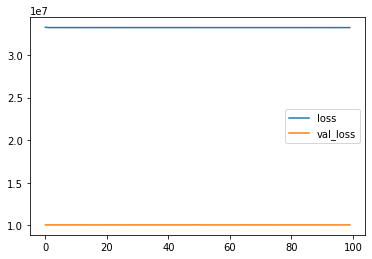

In [82]:
loss1.plot()

# Model is still underfitting as val_loss <<<< loss

In [83]:
prediction1 = model2.predict(X_test)

In [84]:
Result2 = pd.DataFrame(prediction1,T['id'],columns=['trip_duration'])

In [85]:
Result2.to_csv('Result2')

In [92]:
prediction1.mean()

990.4364

In [93]:
prediction.mean()

864.3189

# Comparing both the predictions it looks like model2 performed better than model 1 but still not good

In [98]:
Comparison = pd.concat([Result,Result2],axis=1)

In [99]:
Comparison

,trip_duration,trip_duration
id,,
id3004672,795.021484,844.377319
id3505355,794.515991,850.621094
id1217141,794.962708,845.283020
id2150126,922.432739,1102.600098
id1598245,795.117859,844.040955
...,...,...
id3008929,794.931396,845.249146
id3700764,795.174072,843.277832
id2568735,783.262329,894.501953


# Changing our loss for under optimizer to MeanSquareLogError to kill underfitting and overfitting

In [256]:
model3 = Sequential()

model3.add(Dense(14,activation = 'relu'))
model3.add(Dropout(.5))

model3.add(Dense(14,activation = 'relu'))
model3.add(Dropout(.5))

model3.add(Dense(14,activation = 'relu'))
model3.add(Dropout(.5))

model3.add(Dense(14,activation = 'relu'))
model3.add(Dropout(.5))

model3.add(Dense(1,activation = 'relu'))
#this is the final layer and has one nueron as we are only getting output here

model3.compile(optimizer = 'adam', loss = 'msle')

In [257]:
model3.fit(x=X_train,
          y=y_train,
          validation_split= .1,
          epochs = 50,
          batch_size = 100,
          verbose = 1,
          callbacks=[stop])

Epoch 1/50

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

13128/13128 [==============================] - 13s 992us/step - loss: 1.7009 - val_loss: 0.6432
Epoch 2/50
13128/13128 [==============================] - 13s 1ms/step - loss: 0.8347 - val_loss: 0.6402
Epoch 3/50
13128/13128 [==============================] - 14s 1ms/step - loss: 0.7637 - val_loss: 0.6367
Epoch 4/50
13128/13128 [==============================] - 13s 1ms/step - loss: 0.7396 - val_loss: 0.6385
Epoch 5/50
13128/13128 [==============================] - 13s 1ms/step - loss: 0.7328 

In [258]:
loss3=pd.DataFrame(model3.history.history)


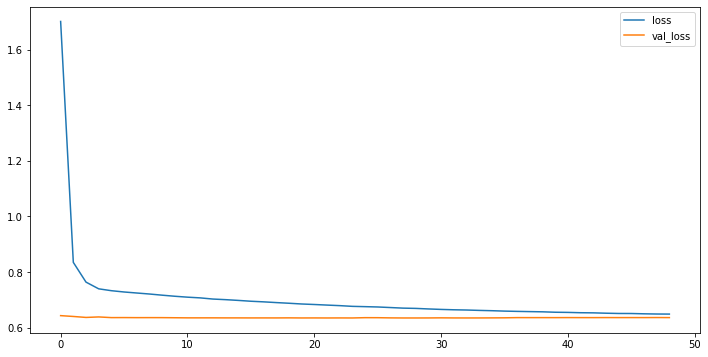

In [263]:

loss3.plot(figsize=(12,6))

# The graph clearly shows we have no under or over fitting

In [264]:
Result = model3.predict(X_test)

In [265]:
Result.mean()

633.4265

# Exporting result to a csv file

In [266]:
R = pd.DataFrame(Result,T['id'],columns=['trip_duration'])

In [267]:
R.to_csv('Result2')